In [124]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [125]:
class my_KNN():
    def __init__(self, k, X_train, y_train):
        self.X = X_train
        self.y = y_train
        self.k = k
        self.n = X_train.shape[0]

    def predict(self, Xtest):
        ntest = Xtest.shape[0]

        self.DistanceMatrix = np.zeros((ntest, self.n))
        self.OrderMatrix = np.zeros((ntest, self.k))

        for sample in range(ntest):
            self.DistanceMatrix[sample,:] = np.linalg.norm(self.X-Xtest[sample,:], ord=2, axis = -1)

        orderMatrix = np.argsort(-self.DistanceMatrix, axis = -1)[:,:self.k]
        y_pred = np.zeros((ntest,))

        for sample in range(ntest):
            closest_nbr_labels = self.y[orderMatrix[sample,:]]
            unique_labels, label_count = np.unique(closest_nbr_labels, return_count=True)
            y_pred[sample] = unique_labels[int(np.argmax(label_count))]

        return y_pred

    def calculate_accuracy(self, Xtest, ytest):

        y_pred = self.predict(Xtest)
        accuracy = (np.sum(ytest.astype(int)==y_pred.astype(int)) / len(ytest)) * 100
        return accuracy

In [126]:
class my_LinearRegression():

    def __init__(self, keep_bias = True, is_normalized = True):

        self.keep_bias = keep_bias

    def fit(self, X ,y):

        nSamples = X.shape[0]
        nDimsX = X.shape[1]
        nDimsY = y.shape[1]

        if self.keep_bias:
            X_aug = np.column_stack((np.ones((nSamples,1)),X))
        else:
            X_aug = X.copy()

        self.W_aug = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_aug),X_aug)),np.transpose(X_aug)),y)

        if self.keep_bias:
            self.b = self.W_aug[0,:]
            self.W = self.W_aug[1:,:]
        else:
            self.b = 0
            self.W = self.W_aug

    def predict(self, Xtest):

        testSamples = Xtest.shape[0]

        if self.keep_bias:
            Xtest_aug = np.column_stack((np.ones((testSamples,1)),Xtest))
        else:
            Xtest_aug = Xtest.copy()
        
        ypred = np.matmul(Xtest_aug, self.W_aug)

        return ypred

    def mean_squared_error(self, Xtest, ytest):

        Ypred = self.predict(Xtest)
        mse = np.mean(np.square(Ypred-ytest))
        return mse

In [127]:
X = np.asarray([-5, -3.2, -1.1, 0.5, 2.6, 4.4]) 
y = np.asarray([12, 9, 3, 0.8, -4, -7])

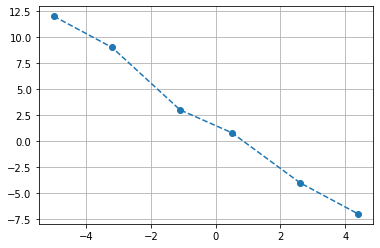

In [128]:
plt.plot(X,y, marker = 'o', linestyle = '--', )
plt.grid()

In [129]:
def my_guessed_params(X,y):
    x2, x1 = X[0], X[-1]
    y2, y1 = y[0], y[-1]

    W = (y2-y1)/(x2-x1)
    b = y1 - W*x1
    return W,b
Wguess, bguess = my_guessed_params(X,y)

x_rand = np.arange(-5,6,1)
y_rand = Wguess*x_rand + bguess

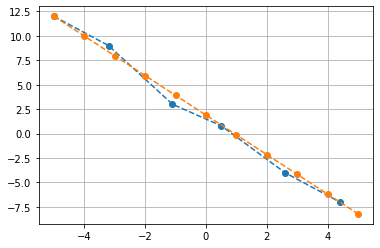

In [130]:
plt.plot(X,y, x_rand, y_rand, marker = 'o', linestyle = '--', )
plt.grid()

In [131]:
guessed_params = {'W':Wguess,
                  'b':bguess}
print(guessed_params)

{'W': -2.021276595744681, 'b': 1.8936170212765973}


In [132]:
my_LR = my_LinearRegression()
my_LR.fit(X.reshape((-1,1)),y.reshape((-1,1)))

In [133]:
my_LR_params = {'W':my_LR.W[0][0],
                'b':my_LR.b[0]}
print(my_LR_params)

{'W': -2.067437379576108, 'b': 1.6797687861271675}


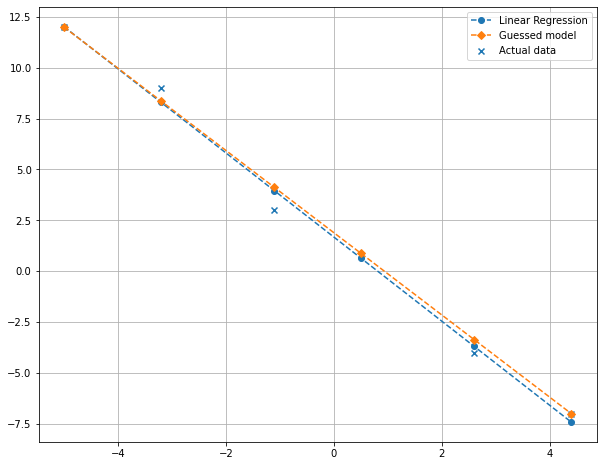

In [134]:
ypred_LR = my_LR_params['W']*X + my_LR_params['b']
ypred_guessed = Wguess*X + bguess

fig = plt.figure(figsize=(10,8))
plt.scatter(X, y, marker = 'x')
plt.plot(X, ypred_LR, marker = 'o', linestyle= '--')
plt.plot(X, ypred_guessed, marker = 'D', linestyle='--')
plt.legend(['Linear Regression','Guessed model','Actual data'])
plt.grid()

In [135]:
mse_LR = my_LR.mean_squared_error(X,y.reshape(-1,1))
mse_guessed = np.mean(np.square(y-ypred_guessed))
print(mse_LR, mse_guessed)

0.2827938342967242 0.34491172476233634


In [136]:
lm = LinearRegression()
lm.fit(X.reshape((-1,1)),y.reshape((-1,1)))
print(lm.coef_, lm.intercept_)
ypred_lm = lm.predict(X.reshape((-1,1)))
mse_lm = np.mean(np.square(ypred_lm-y.reshape((-1,1))))
print(mse_lm)

[[-2.06743738]] [1.67976879]
0.2827938342967247


# **Question 2**

In [167]:
import pandas as pd

In [168]:
data = pd.read_csv('pokemonfun.csv').dropna().values
X, y = data[:,:7], data[:,7:8]

Normalize **first**

In [169]:
minX = np.min(X, axis = 0)
maxX = np.max(X, axis = 0)

Xscaled = (X-minX)/(maxX-minX + 1e-8)

In [170]:
my_LR_multi = my_LinearRegression()
my_LR_multi.fit(Xscaled, y)
ypred = my_LR_multi.predict(Xscaled)

W_myLR, b_myLR = my_LR_multi.W, my_LR_multi.b
mse_myLR = my_LR_multi.mean_squared_error(Xscaled, y)

print('Mean Squared Error: '+str(mse_myLR)+'\n')
print('W_myLR: '+str(W_myLR)+'\n')
print('b_myLR: '+str(b_myLR))

Mean Squared Error: 6415.6175823409785

W_myLR: [[ 43.59587877]
 [145.9941268 ]
 [704.65605824]
 [147.18317029]
 [ -5.20477235]
 [  4.98526211]
 [-64.75098045]]

b_myLR: [-68.69720764]


In [171]:
np.mean(np.square(ypred-y))

6415.6175823409785

In [174]:
lm_multi = LinearRegression()
lm_multi.fit(Xscaled,y)
ypred_lm = lm_multi.predict(Xscaled)
R = lm_multi.score(Xscaled, y)
mse_lm = np.mean(np.square(ypred_lm - y))
W_lm , b_lm = lm_multi.coef_, lm_multi.intercept_

print('Mean Squared Error: '+str(mse_lm)+'\n')
print('W_myLR: '+str(W_lm)+'\n')
print('b_myLR: '+str(b_lm))
print(R)

Mean Squared Error: 6415.6175823409785

W_myLR: [[ 43.59587877 145.9941268  704.65605824 147.18317029  -5.20477235
    4.98526211 -64.75098045]]

b_myLR: [-68.69720764]
0.4628204512420424
